In [ ]:
!mkdir models3

In [ ]:
!ls

In [2]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [64]
num_epochs = [45]
learning_rates = [0.0001,0.001]
optimizers_name = ['rmsprop', 'adam']
num_classes = 10
node_sizes = [32]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

/home/ryantsan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 64
epochs        : 35
optimizer     : rmsprop
learning rate : 0.0001
node size     : 32
Epoch 1/35
781/781 [==============================] - 69s 88ms/step - loss: 1.9834 - acc: 0.2899 - val_loss: 1.5483 - val_acc: 0.4287

Epoch 00001: val_loss improved from inf to 1.54825, saving model to models3/rnn_lstm_64_35_rmsprop_0.0001_32.h5
Epoch 2/35
781/781 [==============================] - 67s 86ms/step - loss: 1.3645 - acc: 0.4922 - val_loss: 1.2401 - val_acc: 0.5239

Epoch 00002: val_loss improved from 1.54825 to 1.24011, saving model to models3/rnn_lstm_64_35_rmsprop_0.0001_32.h5
Epoch 3/35
781/781 [==============================] - 67s 86ms/step - loss: 1.1699 - acc: 0.5465 - val_loss: 1.1332 - val_acc: 0.5625

Epoch 00003: val_loss improved from 1.24011 to 1.13319, saving model to models3/rnn_lstm_64_35_rmsprop_0.0001_32.h5
Epoch 4/35
781/781 [==============================] - 68s 87ms/step - loss: 1.0843 - acc: 0.5822 - val_loss: 1.0519 - val_acc: 0.5961

Epoch 00004:

781/781 [==============================] - 68s 87ms/step - loss: 0.4555 - acc: 0.8391 - val_loss: 0.4524 - val_acc: 0.8372

Epoch 00034: val_loss improved from 0.45888 to 0.45235, saving model to models3/rnn_lstm_64_35_rmsprop_0.0001_32.h5
Epoch 35/35
781/781 [==============================] - 68s 87ms/step - loss: 0.4507 - acc: 0.8404 - val_loss: 0.4580 - val_acc: 0.8350

Epoch 00035: val_loss did not improve from 0.45235


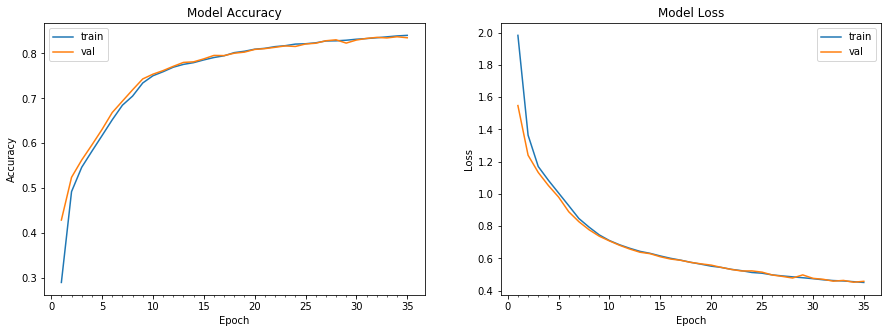

batch size    : 64
epochs        : 35
optimizer     : rmsprop
learning rate : 0.001
node size     : 32
Epoch 1/35
781/781 [==============================] - 69s 89ms/step - loss: 1.1211 - acc: 0.5721 - val_loss: 0.8944 - val_acc: 0.6758

Epoch 00001: val_loss improved from inf to 0.89438, saving model to models3/rnn_lstm_64_35_rmsprop_0.001_32.h5
Epoch 2/35
781/781 [==============================] - 69s 88ms/step - loss: 0.7385 - acc: 0.7341 - val_loss: 0.6630 - val_acc: 0.7540

Epoch 00002: val_loss improved from 0.89438 to 0.66298, saving model to models3/rnn_lstm_64_35_rmsprop_0.001_32.h5
Epoch 3/35
781/781 [==============================] - 69s 88ms/step - loss: 0.6064 - acc: 0.7808 - val_loss: 0.5994 - val_acc: 0.7877

Epoch 00003: val_loss improved from 0.66298 to 0.59936, saving model to models3/rnn_lstm_64_35_rmsprop_0.001_32.h5
Epoch 4/35
781/781 [==============================] - 70s 89ms/step - loss: 0.5386 - acc: 0.8062 - val_loss: 0.5399 - val_acc: 0.8040

Epoch 00004: val

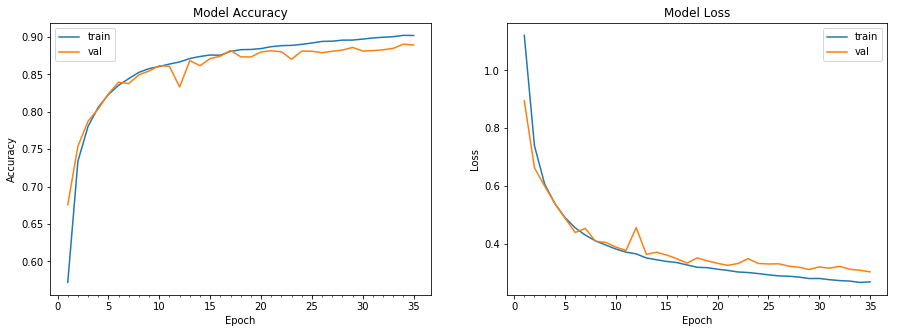

batch size    : 64
epochs        : 35
optimizer     : adam
learning rate : 0.0001
node size     : 32
Epoch 1/35
781/781 [==============================] - 72s 92ms/step - loss: 1.7439 - acc: 0.3507 - val_loss: 1.2757 - val_acc: 0.5051

Epoch 00001: val_loss improved from inf to 1.27574, saving model to models3/rnn_lstm_64_35_adam_0.0001_32.h5
Epoch 2/35
781/781 [==============================] - 69s 89ms/step - loss: 1.1618 - acc: 0.5489 - val_loss: 1.0759 - val_acc: 0.5953

Epoch 00002: val_loss improved from 1.27574 to 1.07589, saving model to models3/rnn_lstm_64_35_adam_0.0001_32.h5
Epoch 3/35
781/781 [==============================] - 69s 88ms/step - loss: 1.0032 - acc: 0.6280 - val_loss: 0.9463 - val_acc: 0.6623

Epoch 00003: val_loss improved from 1.07589 to 0.94629, saving model to models3/rnn_lstm_64_35_adam_0.0001_32.h5
Epoch 4/35
781/781 [==============================] - 69s 88ms/step - loss: 0.9082 - acc: 0.6745 - val_loss: 0.8889 - val_acc: 0.6808

Epoch 00004: val_loss im

781/781 [==============================] - 68s 86ms/step - loss: 0.4658 - acc: 0.8362 - val_loss: 0.4783 - val_acc: 0.8306

Epoch 00035: val_loss improved from 0.48459 to 0.47831, saving model to models3/rnn_lstm_64_35_adam_0.0001_32.h5


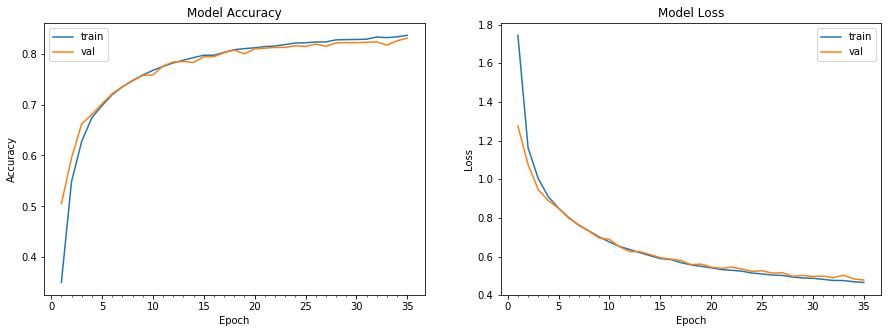

batch size    : 64
epochs        : 35
optimizer     : adam
learning rate : 0.001
node size     : 32
Epoch 1/35
781/781 [==============================] - 69s 88ms/step - loss: 1.1175 - acc: 0.5751 - val_loss: 0.8602 - val_acc: 0.6680

Epoch 00001: val_loss improved from inf to 0.86024, saving model to models3/rnn_lstm_64_35_adam_0.001_32.h5
Epoch 2/35
781/781 [==============================] - 68s 88ms/step - loss: 0.7528 - acc: 0.7309 - val_loss: 0.6467 - val_acc: 0.7780

Epoch 00002: val_loss improved from 0.86024 to 0.64669, saving model to models3/rnn_lstm_64_35_adam_0.001_32.h5
Epoch 3/35
781/781 [==============================] - 73s 94ms/step - loss: 0.5964 - acc: 0.7884 - val_loss: 0.6311 - val_acc: 0.7724

Epoch 00003: val_loss improved from 0.64669 to 0.63108, saving model to models3/rnn_lstm_64_35_adam_0.001_32.h5
Epoch 4/35
781/781 [==============================] - 73s 93ms/step - loss: 0.5209 - acc: 0.8127 - val_loss: 0.5544 - val_acc: 0.8027

Epoch 00004: val_loss improv

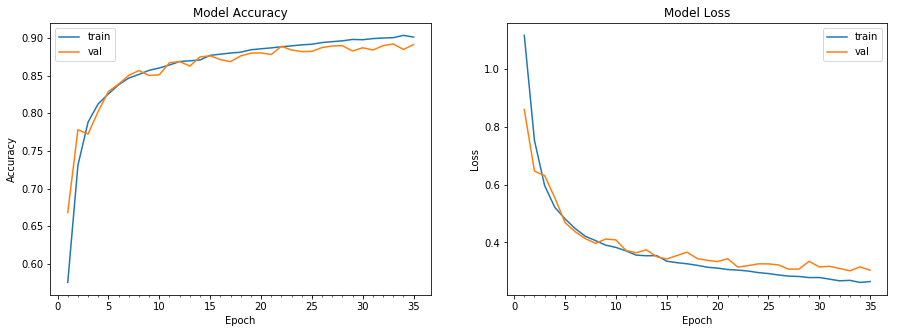

In [3]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            
            model_file_name = "models3/rnn_lstm_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            #model_file_name = "models2/rnn_lstm_{}_{}_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size, val_acc, val_loss)
          
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
            #model_file_name = "models2/rnn_lstm_{}_{}_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size,val_acc,val_loss)
            
            best_model_file_name = "models3/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)